In [1]:
import pandas as pd
import numpy as np

In [2]:
df= pd.read_csv('weight-height.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8555 entries, 0 to 8554
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  8555 non-null   object 
 1   Height  8555 non-null   float64
 2   Weight  8555 non-null   float64
dtypes: float64(2), object(1)
memory usage: 200.6+ KB


In [5]:
x= df.drop('Weight', axis=1)
y=df['Weight']

In [6]:
x.head()

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [7]:
y.head()

0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
Name: Weight, dtype: float64

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le=LabelEncoder()

In [10]:
x.Gender= le.fit_transform(x.Gender)
x.Gender

0       1
1       1
2       1
3       1
4       1
       ..
8550    0
8551    0
8552    0
8553    0
8554    0
Name: Gender, Length: 8555, dtype: int32

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
xtrain, xtest,ytrain, ytest = train_test_split(x, y,test_size=.30, random_state=1)

# Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lr= LinearRegression()

In [15]:
lr.fit(xtrain, ytrain)

LinearRegression()

In [16]:
lr.coef_

array([19.34359322,  5.96887438])

In [17]:
lr.intercept_

-244.5528090325578

In [18]:
lr.predict(xtest)

array([143.83013436, 197.53417989, 184.63515112, ..., 160.7078525 ,
       186.82852694, 201.4226542 ])

In [19]:
lr.score(x,y)

0.899942429187834

In [20]:
lr.score(xtrain, ytrain)

0.8972135459668117

In [21]:
lr.score(xtest,ytest)

0.905995960709116

In [22]:
from sklearn.metrics import mean_squared_error # MSE
pred = lr.predict(xtest)
mse = mean_squared_error(ytest , pred)

In [23]:
mse

99.67250998070031

In [24]:
from sklearn.metrics import mean_absolute_error #MAE
mae = mean_absolute_error(ytest, pred)

In [25]:
mae

7.98213259272913

# KNN ALGORITHM

# KNN Regressor

In [26]:
from sklearn.neighbors import KNeighborsRegressor

In [27]:
knn= KNeighborsRegressor()

In [28]:
knn.fit(xtrain,ytrain)

KNeighborsRegressor()

In [29]:
knn.predict(xtest)

array([150.1761117 , 197.46276978, 179.03501546, ..., 160.26227546,
       180.65461322, 200.56451578])

In [30]:
knn.score(xtrain, ytrain)

0.9170756955071054

In [31]:
knn.score(x,y)

0.9067857242892374

In [32]:
knn.score(xtest, ytest)

0.8838502073708883

In [33]:
from sklearn.metrics import mean_squared_error # MSE
pred = knn.predict(xtest)
mse = mean_squared_error(ytest , pred)

In [34]:
mse

123.15365863436983

In [35]:
from sklearn.metrics import mean_absolute_error #MAE
mae = mean_absolute_error(ytest, pred)
mae

8.850747809837165

# RandomizedSearchCV

In [36]:
n_neighbors= np.random.randint(5,25,5)
weights= ['uniform', 'distance']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
leaf_size= np.random.randint(5,50,5)
p= [1,2]

In [37]:
ids= {
    'n_neighbors':n_neighbors,
    'weights':weights,
    'algorithm':algorithm,
    'leaf_size':leaf_size,
    'p':p
}

In [38]:
print(ids)

{'n_neighbors': array([24, 20, 21, 22, 17]), 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'leaf_size': array([42,  9, 35, 31, 38]), 'p': [1, 2]}


In [39]:
from sklearn.model_selection import RandomizedSearchCV

In [40]:
rcv= RandomizedSearchCV(knn, ids, n_iter = 200, cv=3)

In [41]:
rcv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=3, estimator=KNeighborsRegressor(), n_iter=200,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': array([42,  9, 35, 31, 38]),
                                        'n_neighbors': array([24, 20, 21, 22, 17]),
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']})

In [42]:
rcv.cv_results_

{'mean_fit_time': array([0.00533414, 0.010439  , 0.00521994, 0.        , 0.        ,
        0.00520754, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00520809, 0.        , 0.        , 0.00520794,
        0.        , 0.        , 0.        , 0.        , 0.00521048,
        0.        , 0.        , 0.00520905, 0.        , 0.        ,
        0.        , 0.        , 0.00521167, 0.00520786, 0.        ,
        0.01041524, 0.        , 0.        , 0.        , 0.00520674,
        0.00520889, 0.01041555, 0.        , 0.01041492, 0.01043614,
        0.        , 0.015649  , 0.01041786, 0.00520754, 0.00100001,
        0.        , 0.        , 0.        , 0.01041555, 0.0052104 ,
        0.00520778, 0.        , 0.00522979, 0.        , 0.00521072,
        0.        , 0.01041691, 0.01041277, 0.0104351 , 0.00520937,
        0.00520619, 0.01040721, 0.        , 0.        , 0.        ,
        0.00618664, 0.00683188, 0.00745161, 0.00733074, 0.00316779,
        0.00336281, 0.00733209,

In [43]:
cv_result = pd.DataFrame(rcv.cv_results_)
cv_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_weights,param_p,param_n_neighbors,param_leaf_size,param_algorithm,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005334,0.003772,0.026453,0.003389,uniform,2,21,38,ball_tree,"{'weights': 'uniform', 'p': 2, 'n_neighbors': ...",0.892080,0.889588,0.895103,0.892257,0.002255,42
1,0.010439,0.007382,0.000000,0.000000,uniform,2,20,9,auto,"{'weights': 'uniform', 'p': 2, 'n_neighbors': ...",0.891853,0.889059,0.894951,0.891954,0.002406,76
2,0.005220,0.007382,0.020826,0.007377,uniform,2,24,38,ball_tree,"{'weights': 'uniform', 'p': 2, 'n_neighbors': ...",0.892211,0.889386,0.895312,0.892303,0.002420,8
3,0.000000,0.000000,0.130164,0.007387,distance,2,21,31,brute,"{'weights': 'distance', 'p': 2, 'n_neighbors':...",0.872323,0.873014,0.879407,0.874915,0.003189,168
4,0.000000,0.000000,0.020831,0.007364,distance,1,21,9,ball_tree,"{'weights': 'distance', 'p': 1, 'n_neighbors':...",0.872351,0.873053,0.879444,0.874949,0.003191,150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.005208,0.007365,0.229443,0.026965,uniform,1,22,9,brute,"{'weights': 'uniform', 'p': 1, 'n_neighbors': ...",0.891892,0.889895,0.895063,0.892283,0.002128,31
196,0.000000,0.000000,0.062493,0.000003,uniform,1,20,31,ball_tree,"{'weights': 'uniform', 'p': 1, 'n_neighbors': ...",0.891853,0.889152,0.894952,0.891986,0.002370,66
197,0.000000,0.000000,0.020884,0.007386,distance,2,24,35,auto,"{'weights': 'distance', 'p': 2, 'n_neighbors':...",0.873052,0.873587,0.880159,0.875599,0.003232,120
198,0.005211,0.007370,0.020833,0.007372,distance,2,20,38,auto,"{'weights': 'distance', 'p': 2, 'n_neighbors':...",0.871978,0.872671,0.879090,0.874580,0.003202,180


In [44]:
rcv.best_score_

0.8923302602808524

In [45]:
rcv.best_params_

{'weights': 'uniform',
 'p': 1,
 'n_neighbors': 24,
 'leaf_size': 38,
 'algorithm': 'kd_tree'}

In [46]:
knn2= rcv.best_estimator_
knn2

KNeighborsRegressor(algorithm='kd_tree', leaf_size=38, n_neighbors=24, p=1)

In [47]:
knn2.fit(xtrain, ytrain)

KNeighborsRegressor(algorithm='kd_tree', leaf_size=38, n_neighbors=24, p=1)

In [48]:
knn2.score(xtrain,ytrain)

0.9007621397350515

In [49]:
knn2.score(xtest, ytest)

0.901034823499145

In [50]:
knn2.score(x,y)

0.9008537688243546

In [75]:
0.901034823499145- 0.8838502073708883 #difference between tuned knn and knn

0.017184616128256724

In [76]:
0.901034823499145-0.905995960709116 #difference between tuned knn and linear regression

-0.004961137209971045

In [53]:
pred2 = knn2.predict(xtest)
mse = mean_squared_error(ytest , pred2)
mse

104.93280519574247

In [54]:
105.49562295526903-123.15365863436983 #difference between tuned knn and knn

-17.658035679100806

In [55]:
105.49562295526903-99.67250998070031 #difference between tuned knn and linear regression

5.823112974568716

In [56]:
mae = mean_absolute_error(ytest , pred2)
mae

8.167549488353298

In [57]:
8.17150705440222-8.850747809837165 #difference between tuned knn and knn

-0.6792407554349449

In [58]:
8.17150705440222-7.98213259272913 #difference between tuned knn and linear regression

0.1893744616730899

# KNN Classifier

In [59]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [60]:
df1=df.copy()
df1.Gender=le.fit_transform(df1.Gender)
df1.Gender

0       1
1       1
2       1
3       1
4       1
       ..
8550    0
8551    0
8552    0
8553    0
8554    0
Name: Gender, Length: 8555, dtype: int32

In [61]:
x1= df1.drop('Gender', axis=1)
y1=df1['Gender']

In [62]:
x1.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [63]:
y1.head()

0    1
1    1
2    1
3    1
4    1
Name: Gender, dtype: int32

In [64]:
x1train, x1test,y1train, y1test = train_test_split(x1, y1,test_size=.30, random_state=1)

In [65]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf= KNeighborsClassifier(n_neighbors=10)

In [66]:
knn_clf.fit(x1train,y1train)

KNeighborsClassifier(n_neighbors=10)

In [67]:
y1pred= knn_clf.predict(x1test)

In [68]:
knn_clf.score(x1test,y1test)

0.9216984807167901

In [69]:
knn_clf.score(x1train,y1train)

0.9213426853707415

In [70]:
knn_clf.score(x1,y1)

0.9214494447691408

# Confusion matrix, ROC curve

In [71]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, plot_roc_curve

In [72]:
print(classification_report(y1test, y1pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91      1055
           1       0.94      0.92      0.93      1512

    accuracy                           0.92      2567
   macro avg       0.92      0.92      0.92      2567
weighted avg       0.92      0.92      0.92      2567



In [73]:
confusion_matrix(y1test,y1pred)

array([[ 970,   85],
       [ 116, 1396]], dtype=int64)

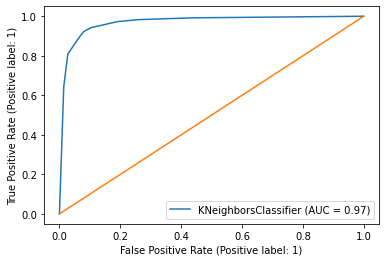

In [74]:
import matplotlib.pyplot as plt
plot_roc_curve(knn_clf, x1test, y1test)
plt.plot([0,1],[0,1])